# Setup and Preprocessing

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [106]:
df = pd.read_csv("LagunaSecaLapTimesMore.csv")
print(df.shape)
print(df.isna().sum())
df

(187, 13)
Name                 0
CarLink              0
Time                 0
PS                   0
Weight_KG            0
Car_type             0
Year                 0
Country_of_Origin    0
Engine_type          0
Displacement         0
Transmission         0
Engine_Layout        0
Drivetrain           0
dtype: int64


,Name,CarLink,Time,PS,Weight_KG,Car_type,Year,Country_of_Origin,Engine_type,Displacement,Transmission,Engine_Layout,Drivetrain
0,Acura ARX-01b,https://fastestlaps.com/models/acura-arx-01b,70.10,558,825,Coupe,2008.0,Japan,V8 DOHC,3.4,6 speed Sequential,middle engine,rear wheel drive
1,Porsche RS Spyder (Evo),https://fastestlaps.com/models/porsche-rs-spyder,70.35,510,775,Coupe,2007.0,Germany,V8 DOHC,3.4,6 speed Sequential,middle engine,rear wheel drive
2,Acura ARX-01a,https://fastestlaps.com/models/acura-arx-01a,70.91,558,825,Coupe,2007.0,Germany,V8 DOHC,3.4,6 speed Sequential,middle engine,rear wheel drive
3,Audi R10 TDI,https://fastestlaps.com/models/audi-r10-tdi,71.17,659,925,Coupe,2006.0,Germany,V12 DOHC Twin Turbo,5.5,5 speed Sequential,middle engine,rear wheel drive
4,Porsche RS Spyder,https://fastestlaps.com/models/porsche-rs-spyd...,74.03,487,775,Coupe,2005.0,Germany,V8 DOHC,3.0,6 speed Sequential,middle engine,rear wheel drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Honda NSX (facelift),https://fastestlaps.com/models/honda-nsx,117.00,290,1368,Coupe,2004.0,Japan,V6,3.2,6,middle engine,rear wheel drive
183,Porsche Boxster S (981),https://fastestlaps.com/models/porsche-boxster...,119.01,315,1400,Convertible,2012.0,Germany,boxer/6,3.4,6-speed-manual / 7-speed-PDK,middle engine,rear wheel drive
184,Chevrolet Camaro Z28,https://fastestlaps.com/models/chevrolet-camar...,125.80,193,1448,Coupe,1982.0,United States,305ci V8,5.0,5,front engine,rear wheel drive
185,Ford Mustang GT,https://fastestlaps.com/models/ford-mustang-gt...,129.90,159,1422,Coupe,1982.0,United States,5.0 V8,5.0,5,front engine,rear wheel drive


In [107]:
print(f"Unique engine types: {len(df['Engine_type'].unique())}")
print(f"Unique trasmissions: {len(df['Transmission'].unique())}")
print(f"Unique engine layouts: {len(df['Engine_Layout'].unique())}")
print(f"Unique drivetrains: {len(df['Drivetrain'].unique())}")

Unique engine types: 139
Unique trasmissions: 111
Unique engine layouts: 3
Unique drivetrains: 3


In [108]:
# Drop unnecessary columns
pruned_df = df.drop(["Name", "CarLink", "Year", "Country_of_Origin", "Car_type", "Engine_type", "Transmission"], axis=1)

# Shuffle the DataFrame rows
pruned_df = pruned_df.sample(frac = 1)
pruned_df

,Time,PS,Weight_KG,Displacement,Engine_Layout,Drivetrain
178,114.22,320,1414,3.6,rear engine,rear wheel drive
55,96.26,639,2112,4.0,front engine,all wheel drive
98,99.89,480,1618,3.6,rear engine,all wheel drive
100,100.05,608,1902,5.2,front engine,rear wheel drive
65,96.83,533,1724,5.2,front engine,rear wheel drive
...,...,...,...,...,...,...
162,110.11,220,1372,2.0,front engine,front wheel drive
99,99.95,400,1482,2.5,front engine,all wheel drive
119,101.77,573,1682,5.9,front engine,rear wheel drive
74,98.27,725,1849,5.2,front engine,rear wheel drive


In [156]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = pruned_df.iloc[:, 1:]
y = pruned_df["Time"]

# Column transformer for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), [0, 1, 2]),
        ('encoder', OneHotEncoder(), [3, 4]),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
preprocessor.fit_transform(X_train).shape


(140, 9)

In [110]:
def plot_results(x, y_pred, title, x_label):
    # Plot the results
    plt.scatter(x, y_test, color='black', label='Test Values')
    plt.scatter(x, y_pred, color='blue', label='Predictions')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Lap Time (s)')
    plt.legend()
    plt.show()

# Regression Models

Mean absolute error: 3.857819473957838
Mean square error: 42.54899684504975


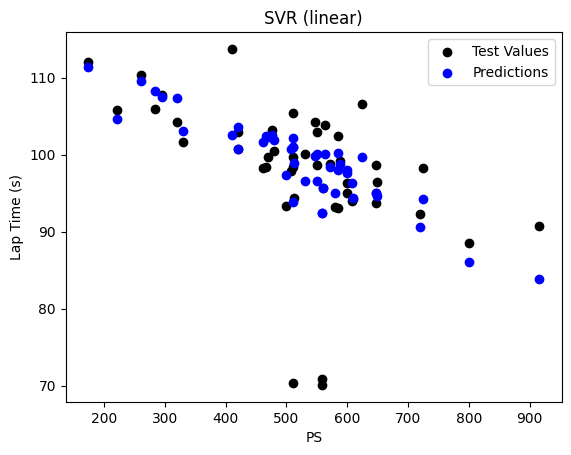

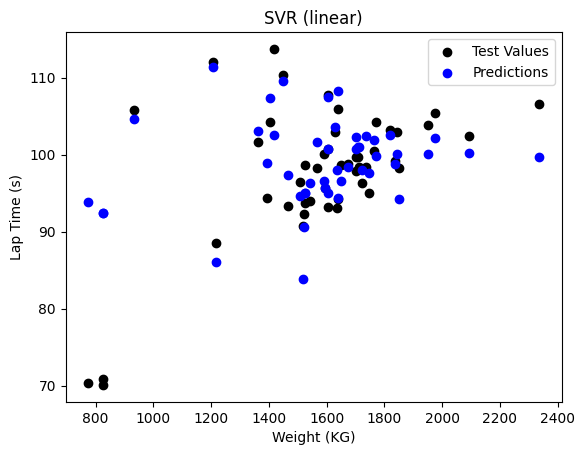

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

# SVR with linear kernel
model = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel="linear"))
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean square error: {mean_squared_error(y_test, y_pred)}")

plot_results(X_test.loc[:, "PS"], y_pred, "SVR (linear)", "PS")
plot_results(X_test.loc[:, "Weight_KG"], y_pred, "SVR (linear)", "Weight (KG)")

Mean absolute error: 4.305489652971309
Mean square error: 55.230559252817834


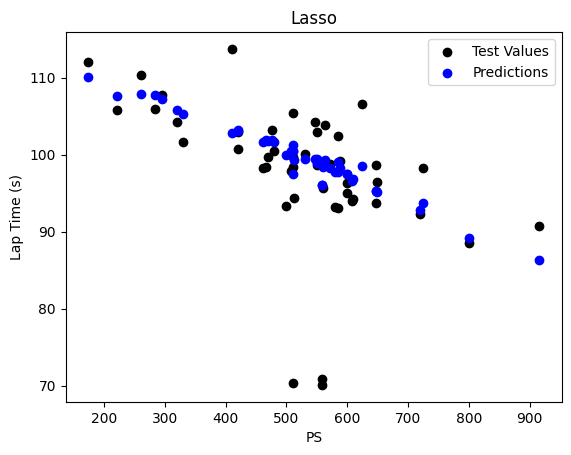

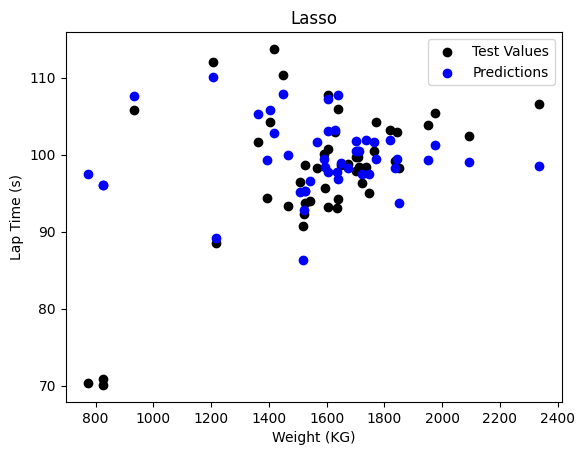

In [112]:
from sklearn.linear_model import Lasso

# Lasso
model = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean square error: {mean_squared_error(y_test, y_pred)}")

plot_results(X_test.loc[:, "PS"], y_pred, "Lasso", "PS")
plot_results(X_test.loc[:, "Weight_KG"], y_pred, "Lasso", "Weight (KG)")

Mean absolute error: 3.916318074973435
Mean square error: 42.962605069475586


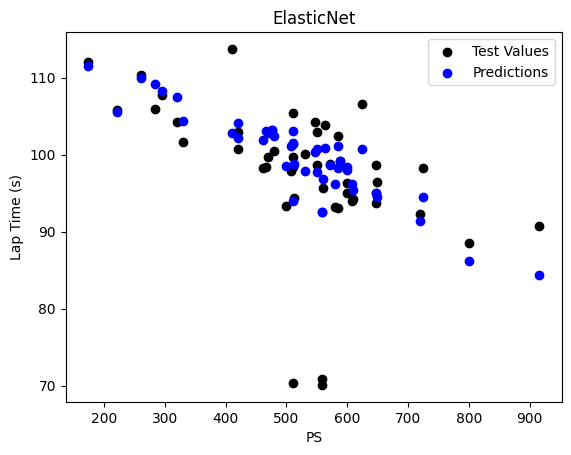

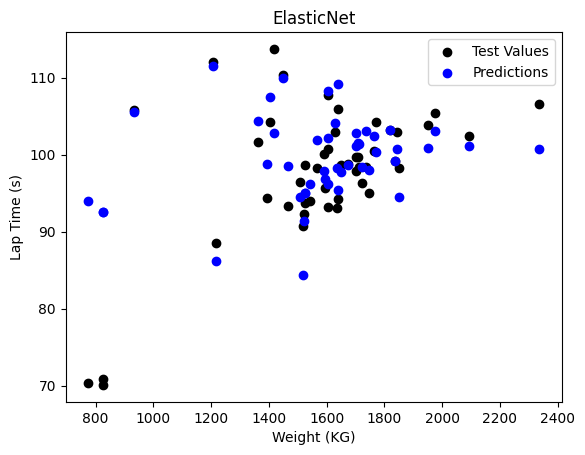

In [164]:
from sklearn.linear_model import ElasticNetCV

# ElasticNet
model = Pipeline([
    ('preprocessor', preprocessor),
    ('en', ElasticNetCV(cv=5, random_state=42))
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean square error: {mean_squared_error(y_test, y_pred)}")

plot_results(X_test.loc[:, "PS"], y_pred, "ElasticNet", "PS")
plot_results(X_test.loc[:, "Weight_KG"], y_pred, "ElasticNet", "Weight (KG)")

# Simple Neural Net

In [150]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import MeanAbsoluteError
from keras.callbacks import History

# Preprocess data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.fit_transform(X_test)

model_1 = Sequential([
    Dense(3, input_dim=9, activation='relu'),
    Dense(1, activation='linear')
])



# Compile the model
model_1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_1: History = model_1.fit(X_train_scaled, y_train, verbose=0, epochs=800)

# Evaluate the model on the test set
y_pred = model_1.predict(X_test_scaled)

# Calculate mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

2/2 [==============================] - 0s 2ms/step
Mean Squared Error: 54.519918369714176
Mean Absolute Error: 5.468290580587183


In [153]:
model_2 = Sequential([
    Dense(15, input_dim=9, activation='relu'),
    Dense(1, activation='linear')
])



# Compile the model
model_2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_2: History = model_2.fit(X_train_scaled, y_train, verbose=0, epochs=800)

# Evaluate the model on the test set
y_pred = model_2.predict(X_test_scaled)

# Calculate mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

2/2 [==============================] - 0s 2ms/step
Mean Squared Error: 54.9616239786333
Mean Absolute Error: 5.208328182139295


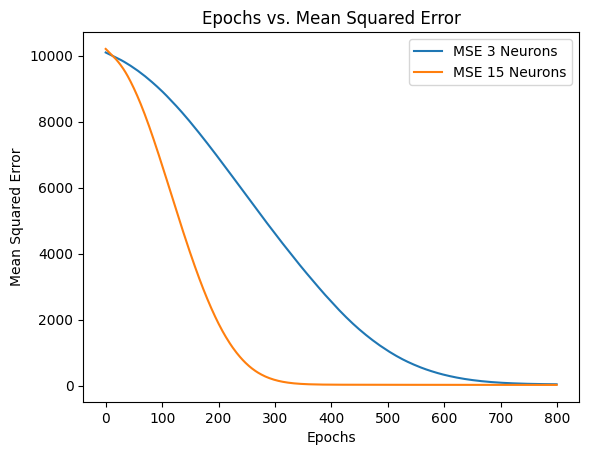

In [154]:
plt.plot(history_1.history['loss'], label='MSE 3 Neurons')
plt.plot(history_2.history['loss'], label='MSE 15 Neurons')
plt.title('Epochs vs. Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Grid Search

Best Hyperparameters: {'svr__C': 10, 'svr__kernel': 'rbf'}
Mean absolute error: 2.8582437472736157
Mean square error: 22.941929511518282


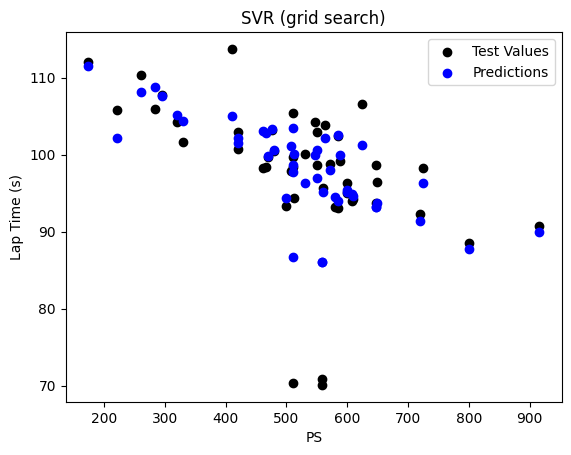

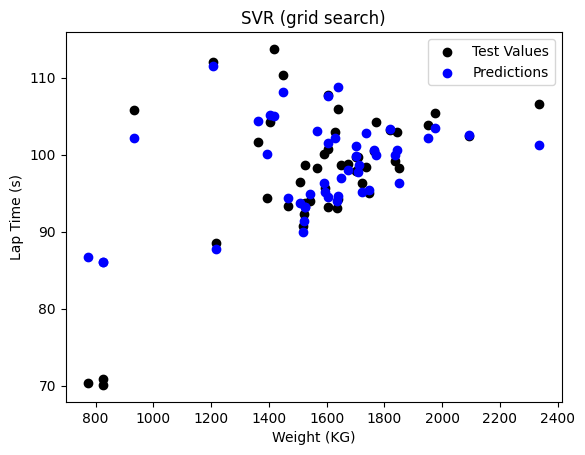

In [163]:
from sklearn.model_selection import GridSearchCV

model = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR())
])

params = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
}

grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print the mean squared error on the test set
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean square error: {mean_squared_error(y_test, y_pred)}")

plot_results(X_test.loc[:, "PS"], y_pred, "SVR (grid search)", "PS")
plot_results(X_test.loc[:, "Weight_KG"], y_pred, "SVR (grid search)", "Weight (KG)")

Best Hyperparameters: {'en__eps': 0.001, 'en__l1_ratio': 0.1}
Mean absolute error: 3.8936667971213006
Mean square error: 42.855008189967066


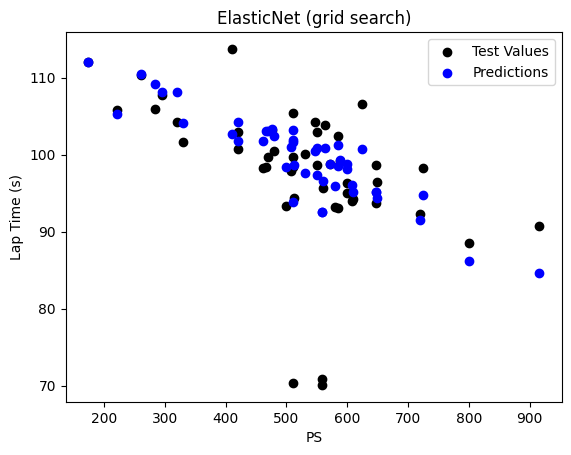

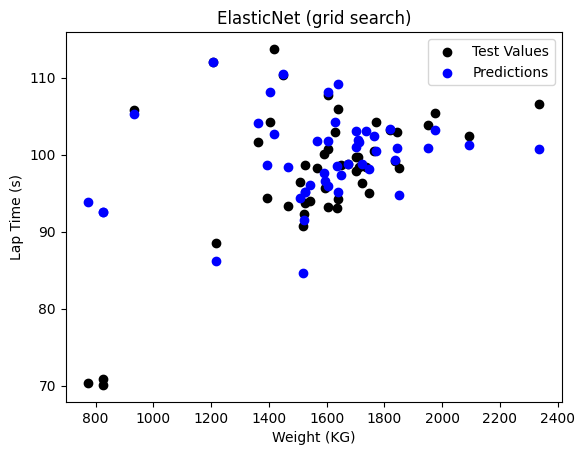

In [165]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('en', ElasticNetCV())
])

params = {
    'en__l1_ratio': [0.1, 0.5, 0.7, 0.9],
    'en__eps': [1e-3, 1e-4, 1e-5],
}

grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print the mean squared error on the test set
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean square error: {mean_squared_error(y_test, y_pred)}")

plot_results(X_test.loc[:, "PS"], y_pred, "ElasticNet (grid search)", "PS")
plot_results(X_test.loc[:, "Weight_KG"], y_pred, "ElasticNet (grid search)", "Weight (KG)")